## Import statement

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

## importing data

In [2]:
sdf=pd.read_csv('/content/drive/MyDrive/project data/Top 100 most Streamed - Sheet1.csv')

In [3]:
sdf.head(5)

,title,artist,top genre,year,beats.per.minute,energy,danceability,loudness.dB,liveness,valance,length,acousticness,speechiness,popularity
0,Blinding Lights,The Weeknd,canadian contemporary r&b,2020,171,73,51,-6,9,33,200,0,6,91
1,Watermelon Sugar,Harry Styles,pop,2019,95,82,55,-4,34,56,174,12,5,88
2,Mood (feat. iann dior),24kGoldn,cali rap,2021,91,72,70,-4,32,73,141,17,4,88
3,Someone You Loved,Lewis Capaldi,pop,2019,110,41,50,-6,11,45,182,75,3,86
4,Perfect,Ed Sheeran,pop,2017,95,45,60,-6,11,17,263,16,2,86


In [4]:
sdf.shape

(100, 14)

In [ ]:
sdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   title             100 non-null    object
 1   artist            100 non-null    object
 2   top genre         100 non-null    object
 3   year              100 non-null    int64 
 4   beats.per.minute  100 non-null    int64 
 5   energy            100 non-null    int64 
 6   danceability      100 non-null    int64 
 7   loudness.dB       100 non-null    int64 
 8   liveness          100 non-null    int64 
 9   valance           100 non-null    int64 
 10  length            100 non-null    int64 
 11  acousticness      100 non-null    int64 
 12  speechiness       100 non-null    int64 
 13  popularity        100 non-null    int64 
dtypes: int64(11), object(3)
memory usage: 11.1+ KB


## which is the most popular song

In [ ]:
sdf[sdf.popularity==sdf.popularity.max()]

,title,artist,top genre,year,beats.per.minute,energy,danceability,loudness.dB,liveness,valance,length,acousticness,speechiness,popularity
0,Blinding Lights,The Weeknd,canadian contemporary r&b,2020,171,73,51,-6,9,33,200,0,6,91


## The singer that haveing heighest no of hits

In [ ]:
sdf.artist.value_counts()

Post Malone          7
Ed Sheeran           5
The Weeknd           4
Imagine Dragons      4
Billie Eilish        3
                    ..
Mike Posner          1
Jason Mraz           1
Marshmello           1
Justin Timberlake    1
Lukas Graham         1
Name: artist, Length: 64, dtype: int64

In [ ]:
data = sdf.artist.value_counts()
fig = px.bar(x=data.index, y=data.values,color=data.index,title='singer vs number of songs')
fig.update_layout(
    xaxis_title="singers",
    yaxis_title="NO of songs")

fig.show()

In [ ]:
print('The most hit songs by {} and no of songs by him is {}'.format(sdf.artist.value_counts().head(1).index[0],sdf.artist.value_counts().head(1).values[0]))

The most hit songs by Post Malone and no of songs by him is 7


## From top 100 hit songs ,No of songs per year

In [ ]:
sdf.year.value_counts()

2018    20
2019    16
2016    16
2015    13
2017    12
2014     6
2013     4
2021     3
2020     3
2012     3
2008     1
2004     1
1995     1
1975     1
Name: year, dtype: int64

In [ ]:
import plotly.graph_objects as go

labels = sdf.year.value_counts().index
values = sdf.year.value_counts().values

fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.4,title='song realese per year')])
fig.show()

## Top genre that have heighest no of songs in the top100 list

In [ ]:
sdf['top genre'].value_counts()

dance pop                    28
pop                          11
dfw rap                       7
modern rock                   6
canadian pop                  6
canadian contemporary r&b     4
electropop                    4
melodic rap                   3
rap                           2
emo rap                       2
canadian hip hop              2
folk-pop                      2
latin                         2
australian pop                1
gangster rap                  1
boy band                      1
neo soul                      1
brostep                       1
beatlesque                    1
north carolina hip hop        1
pop dance                     1
danish pop                    1
alternative rock              1
pop rap                       1
chicago rap                   1
detroit hip hop               1
cali rap                      1
acoustic pop                  1
lgbtq+ hip hop                1
classic rock                  1
irish singer-songwriter       1
consciou

In [ ]:
data = sdf['top genre'].value_counts()

fig = px.bar(x=data.index, y=data.values,color=data.index,title='Genre vs number of songs')
fig.update_layout(
    xaxis_title="Genre",
    yaxis_title="NO of songs")

fig.show()

In [ ]:
print('Top genre that have most songs in 100 is ',sdf['top genre'].value_counts().head(1).index[0])

Top genre that have most songs in 100 is  dance pop


### what is the beat per min avrage for a dance pop song

In [ ]:
print('avrage beat per min for a dancepop song is',sdf[sdf['top genre']=='dance pop']['beats.per.minute'].mean())
print('avrage energy for a dancepop song is',sdf[sdf['top genre']=='dance pop']['energy'].mean())

print('avrage beat per min for a dancepop song is',sdf[sdf['top genre']=='dance pop']['danceability'].mean())


avrage beat per min for a dancepop song is 111.03571428571429
avrage energy for a dancepop song is 63.17857142857143
avrage beat per min for a dancepop song is 70.32142857142857


## what is the range of beats per minute for top songs

In [ ]:
sdf['beats.per.minute'].mean()

116.97

In [ ]:
sdf['beats.per.minute'].max()

186

In [ ]:
sdf['beats.per.minute'].min()

71

## lets analyze how the beats per range affect the popularity

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



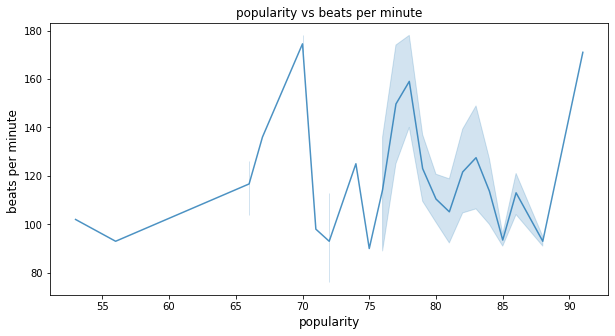

In [ ]:

plt.figure(figsize=(10,5))
sns.lineplot(sdf['popularity'],sdf['beats.per.minute'], alpha=0.8)

plt.title('popularity vs beats per minute')
plt.ylabel('beats per minute ', fontsize=12)
plt.xlabel('popularity', fontsize=12)
plt.show()

In [ ]:
fig=px.box(y=sdf['beats.per.minute'],points="all")
fig.update_layout(
    yaxis_title="beats per minute")
fig.show()

### The genre which are having high beats per min songs

In [ ]:
sdf[sdf['beats.per.minute']>150]['top genre'].value_counts()

latin                        2
canadian contemporary r&b    2
modern rock                  2
dance pop                    1
rap                          1
melodic rap                  1
acoustic pop                 1
dfw rap                      1
detroit hip hop              1
beatlesque                   1
Name: top genre, dtype: int64

## what is the energy range for top songs

In [ ]:
fig=px.box(sdf,y='energy',points="all")
fig.update_layout(
    yaxis_title="energy")
fig.show()

### demand of energy in songs year wise

In [ ]:
fig=px.box(sdf,y='energy',points="all",color='year')
fig.update_layout(
    yaxis_title="energy")
fig.show()

## what is the length of popular songs

In [ ]:
for i in range(60,300,30):
  a,b=sdf[sdf.length>=i].shape
  print('There are {}  songs that has length over {} minutes'.format(a,i/60))


There are 100  songs that has length over 1.0 minutes
There are 100  songs that has length over 1.5 minutes
There are 99  songs that has length over 2.0 minutes
There are 98  songs that has length over 2.5 minutes
There are 85  songs that has length over 3.0 minutes
There are 50  songs that has length over 3.5 minutes
There are 21  songs that has length over 4.0 minutes
There are 6  songs that has length over 4.5 minutes


In [ ]:
fig=px.box(sdf,y='length',points="all")
fig.update_layout(
    yaxis_title="length")
fig.show()

## which singer prefers which type of song

In [ ]:
for i in sdf.artist.unique():
  print('{} is beter at singing {} type of songs'.format(i,sdf[sdf.artist==i]['top genre'].value_counts().head(1).index[0]))

The Weeknd is beter at singing canadian contemporary r&b type of songs
Harry Styles is beter at singing pop type of songs
24kGoldn is beter at singing cali rap type of songs
Lewis Capaldi is beter at singing pop type of songs
Ed Sheeran is beter at singing pop type of songs
Imagine Dragons is beter at singing modern rock type of songs
Billie Eilish is beter at singing electropop type of songs
Post Malone is beter at singing dfw rap type of songs
Maroon 5 is beter at singing pop type of songs
The Chainsmokers is beter at singing dance pop type of songs
James Arthur is beter at singing pop type of songs
Juice WRLD is beter at singing chicago rap type of songs
John Legend is beter at singing neo soul type of songs
Ariana Grande is beter at singing dance pop type of songs
XXXTENTACION is beter at singing emo rap type of songs
Travis Scott is beter at singing rap type of songs
Avicii is beter at singing dance pop type of songs
DaBaby is beter at singing north carolina hip hop type of songs


## Types of songs that were trending in each year

In [ ]:
for i in sdf.year.unique():
  print('for year {} the spotify trending genre is {}'.format(i,sdf[sdf.year==i]['top genre'].value_counts().head(1).index[0]))

for year 2020 the spotify trending genre is canadian contemporary r&b
for year 2019 the spotify trending genre is dance pop
for year 2021 the spotify trending genre is pop dance
for year 2017 the spotify trending genre is dance pop
for year 2018 the spotify trending genre is dance pop
for year 2016 the spotify trending genre is dance pop
for year 2013 the spotify trending genre is dance pop
for year 2014 the spotify trending genre is pop
for year 2015 the spotify trending genre is canadian pop
for year 2012 the spotify trending genre is modern rock
for year 1975 the spotify trending genre is classic rock
for year 2004 the spotify trending genre is alternative rock
for year 2008 the spotify trending genre is acoustic pop
for year 1995 the spotify trending genre is beatlesque


## No of trending songs realese in each year

In [ ]:
for i in sdf.year.unique():
  print('From the year {} there are {} songs in spotify 100 trending list'.format(i,sdf[sdf.year==i]['year'].value_counts().values[0]))

From the year 2020 there are 3 songs in spotify 100 trending list
From the year 2019 there are 16 songs in spotify 100 trending list
From the year 2021 there are 3 songs in spotify 100 trending list
From the year 2017 there are 12 songs in spotify 100 trending list
From the year 2018 there are 20 songs in spotify 100 trending list
From the year 2016 there are 16 songs in spotify 100 trending list
From the year 2013 there are 4 songs in spotify 100 trending list
From the year 2014 there are 6 songs in spotify 100 trending list
From the year 2015 there are 13 songs in spotify 100 trending list
From the year 2012 there are 3 songs in spotify 100 trending list
From the year 1975 there are 1 songs in spotify 100 trending list
From the year 2004 there are 1 songs in spotify 100 trending list
From the year 2008 there are 1 songs in spotify 100 trending list
From the year 1995 there are 1 songs in spotify 100 trending list


## what is the liveness range for a good music 

In [ ]:
fig=px.box(y=sdf['liveness'],points="all")
fig.update_layout(
    yaxis_title="liveness")
fig.show()

In [ ]:
print('song having low liveness:')
sdf[sdf.liveness==sdf.liveness.min()]

song having low liveness:


,title,artist,top genre,year,beats.per.minute,energy,danceability,loudness.dB,liveness,valance,length,acousticness,speechiness,popularity
26,The Box,Roddy Ricch,melodic rap,2019,117,59,90,-7,79,64,197,10,6,83


In [ ]:
print('song having high liveness:')
sdf[sdf.liveness==sdf.liveness.max()]

song having high liveness:


,title,artist,top genre,year,beats.per.minute,energy,danceability,loudness.dB,liveness,valance,length,acousticness,speechiness,popularity
26,The Box,Roddy Ricch,melodic rap,2019,117,59,90,-7,79,64,197,10,6,83


## what is the acousticness range for trending songs

In [ ]:
fig=px.box(y=sdf['acousticness'],points="all")
fig.update_layout(
    yaxis_title="acousticness")
fig.show()

In [ ]:
print('song haveing Low acousticness is',sdf[sdf.acousticness==sdf.liveness.min()].title.values[0])

song haveing Low acousticness is Can't Hold Us - feat. Ray Dalton


## Displot for song's attributes

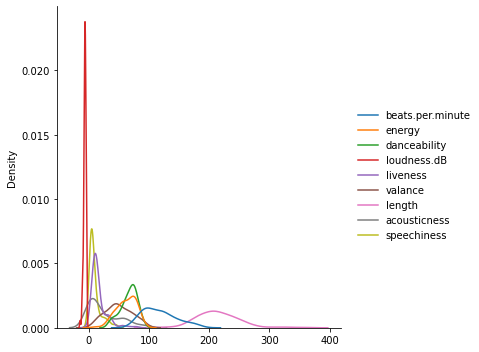

In [ ]:
sns.displot(data = sdf[['beats.per.minute',
 'energy',
 'danceability',
 'loudness.dB',
 'liveness',
 'valance',
 'length',
 'acousticness',
 'speechiness']],  kind = 'kde')